In [1]:
from natpn import NaturalPosteriorNetwork


2023-12-21 13:42:41.572203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2023-12-21 13:42:41.572225: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from read_data import get_synth_data, load_dataset
import matplotlib.pyplot as plt
import numpy as np

from layers.dense import *
import tensorflow as tf
from quantilelosses import *

In [3]:
from natpn.datasets import ConcreteDataModule
dm = ConcreteDataModule()

In [4]:
estimator = NaturalPosteriorNetwork(
    encoder="tabular",
    flow_num_layers=2,
    learning_rate=3e-4,
    learning_rate_decay=True,
    trainer_params=dict(max_epochs=500),
)

In [5]:
estimator.fit(dm)

/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(
/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running warmup...
No need to prep'...
Preparing 'Energy'...

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | NaturalPosteriorNetworkModel | 10.0 K
-------------------------------------------------------
10.0 K    Trainable params
0         Non-trainable params
10.0 K    Total params
0.040     Total estimated model param

Loading dataset concrete....
Done loading dataset concrete
torch.Size([742, 8])
torch.Size([742])
torch.Size([185, 8])
torch.Size([185])
torch.Size([103, 8])
torch.Size([103])
                                                                            

/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 87.25it/s, loss=12.8, train/log_prob=-12.8, val/log_prob=-12.8] 

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 84.13it/s, loss=12.8, train/log_prob=-12.8, val/log_prob=-12.8]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running training...
/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


No need to prep'...
Preparing 'Energy'...


Epoch 68:  67%|██████▋   | 2/3 [00:00<00:00, 71.58it/s, loss=0.901, train/log_prob=-13.7, val/loss=0.985, val/log_prob=-13.8, val/rmse=0.589, val/calibration=0.0986]

/home/fbohy/evi-q/evi-q/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running fine-tuning...
No need to prep'...
Preparing 'Energy'...


Epoch 499: 100%|██████████| 3/3 [00:00<00:00, 76.00it/s, loss=6.87, train/log_prob=-6.81, val/log_prob=-7.41] 

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 499: 100%|██████████| 3/3 [00:00<00:00, 62.10it/s, loss=6.87, train/log_prob=-6.81, val/log_prob=-7.41]


In [9]:
preds, sigma = estimator.model_(torch.tensor(X_train))

NameError: name 'X_train' is not defined

In [10]:
import torch

In [11]:
preds.

SyntaxError: invalid syntax (3186475834.py, line 1)

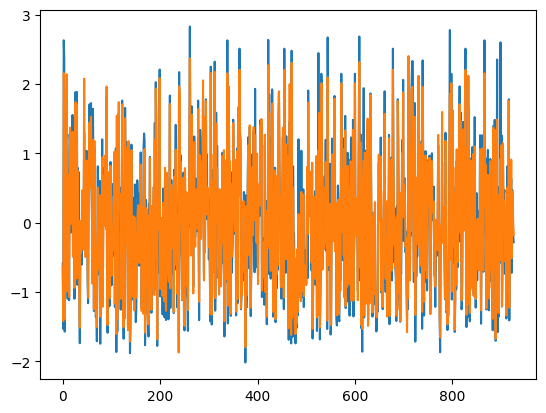

In [ ]:
plt.plot(y_train)
plt.plot(preds.mu.detach().numpy())

In [ ]:
import torch